In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

c:\Users\Ankit Nag\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
IMG_SHAPE =(224, 224)
BATCH_SIZE = 32

train_dir= "./animal151/train/"  
test_dir="./animal151/val"

import tensorflow as tf
IMG_SIZE = (224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 4954 files belonging to 150 classes.
Found 589 files belonging to 150 classes.


In [4]:
val_dir='./animal151/test/'
validation = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 694 files belonging to 150 classes.


In [5]:
class_names = train_data.class_names
class_names

['African Bush Elephant',
 'African Lionfish',
 'African Penguin',
 'African Spurred Tortoise',
 'Altamira Oriole',
 'American Bison',
 'American Cockroach',
 'American Flamingo',
 'American Marten',
 'American Robin',
 'American white ibis',
 'Andean Condor',
 'Ankylosaurus',
 'Ant',
 'Baltimore Oriole',
 'Bee Hummingbird',
 'Beluga',
 'Bighorn Sheep',
 'Black Rat',
 'Black-capped Chickadee',
 'Blue Jay',
 'Blue Whale',
 'Boto',
 'Brown-throated Three-toed Sloth',
 'Bullock Mountains False Toad',
 'Canada Goose',
 'Carolina Wren',
 'Cat',
 'Cheetah',
 'Chicken',
 'Coelacanth',
 'Common Bottlenose Dolphin',
 'Common Eland',
 'Common House Fly',
 'Common Lionfish',
 'Common Ostrich',
 'Corn Snake',
 'Cougar',
 'Crested Auklet',
 'Crested Giant Gecko',
 'Crocodile',
 "Dead Man's Fingers",
 'Diplodocus',
 'Domestic Cow',
 'Domestic Dog',
 'Dugong',
 'Eastern Copperhead',
 'Eastern Gray Squirrel',
 'Eastern Kingbird',
 'Eastern Ratsnake',
 'Eastern Tiger Swallowtail',
 'Emperor Penguin',
 

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('chatur_animal_EN.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
model_earlyStopping = EarlyStopping(min_delta= 0.001, patience=10)

In [23]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
                  preprocessing.RandomFlip("horizontal"),
                  preprocessing.RandomRotation(0.2),
                  preprocessing.RandomHeight(0.2),
                  preprocessing.RandomWidth(0.2),
                  preprocessing.RandomZoom(0.2)
], name="data_augmentaion_layer")

In [24]:
import os


steps_per_epoch=len(train_data)
validation_steps=int(0.2 * len(test_data))
steps_per_epoch, validation_steps

(155, 3)

In [25]:
input_shape= (224,224,3)

base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape, name="input_layer")


x=data_augmentation(inputs)

x = base_model(x, training=False)

x= tf.keras.layers.GlobalAveragePooling2D()(x)

outputs= tf.keras.layers.Dense(150, activation="softmax", name="output_layer")(x)

model=tf.keras.Model(inputs, outputs)

In [26]:
model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [28]:
history=model.fit(train_data,
          steps_per_epoch=steps_per_epoch,
          epochs=10,
          validation_data=test_data,
          validation_steps=validation_steps,
          callbacks = [model_checkpoint, model_earlyStopping])

Epoch 1/10
155/155 [==============================] - ETA: 0s - loss: 2.7904 - accuracy: 0.5339
Epoch 1: val_loss improved from inf to 1.04163, saving model to chatur_animal_EN.hdf5
155/155 [==============================] - 217s 1s/step - loss: 2.7904 - accuracy: 0.5339 - val_loss: 1.0416 - val_accuracy: 0.8333
Epoch 2/10
155/155 [==============================] - ETA: 0s - loss: 0.9000 - accuracy: 0.8551
Epoch 2: val_loss improved from 1.04163 to 0.56794, saving model to chatur_animal_EN.hdf5
155/155 [==============================] - 233s 2s/step - loss: 0.9000 - accuracy: 0.8551 - val_loss: 0.5679 - val_accuracy: 0.8854
Epoch 3/10
155/155 [==============================] - ETA: 0s - loss: 0.5376 - accuracy: 0.9094
Epoch 3: val_loss improved from 0.56794 to 0.45115, saving model to chatur_animal_EN.hdf5
155/155 [==============================] - 227s 1s/step - loss: 0.5376 - accuracy: 0.9094 - val_loss: 0.4511 - val_accuracy: 0.8958
Epoch 4/10
155/155 [==============================

In [29]:
from IPython.display import FileLink
FileLink(r'./chatur_animal_EN.hdf5')

c:\Users\Ankit Nag\Dropbox\My PC (LAPTOP-MIS1LSEU)\Desktop\miscellaneous\animal\chatur_animal_EN.hdf5

In [30]:
loaded_model = tf.keras.models.load_model('chatur_animal_EN.hdf5')

In [31]:
loaded_model.evaluate(validation)

22/22 [==============================] - 32s 1s/step - loss: 0.3808 - accuracy: 0.9006


[0.38080859184265137, 0.9005763530731201]

1/1 [==============================] - 0s 130ms/step


Text(0.5, 1.0, 'Ant')

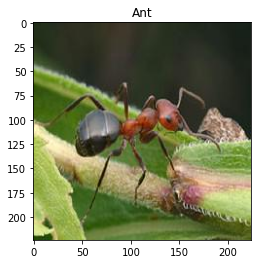

In [35]:
import matplotlib.pyplot as plt

img = plt.imread('animal151/val/Ant/formicidae_6_2cff2ec1.jpg')
predictions = loaded_model.predict(tf.expand_dims(img, axis=0))
label = class_names[predictions.argmax()]
plt.imshow(img)
plt.title(label)